# Classification and Regression with a Neural Network in Pytorch

Welcome to your first programming assignment! 
In this assignment you will build your first classification and regression neural networks.
This assignment is a 'step-through' guide to implement a simple fully-connected neural network in Pytorch.

* In the first part of this exercise, you will implement a neural network with a 2 dimensional input. Your dataset is based on a two circles-shaped groups for classification.

* Then, in the second part of this exercise, you will implement a regression model for predicting the output of a two dimensional function.

# Packages
Let's first import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch
from torch import nn

# Dataset

In [2]:
# define seed
random_num = 0
np.random.seed(random_num)
torch.manual_seed(random_num)
# crate data and labels
x, y = make_circles(500, noise=0.075)
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Visualize the dataset using matplotlib:**

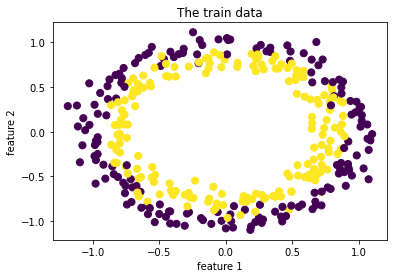

In [3]:
# create figure
fig = plt.figure()
# plot a scatter plot with the train data (2 dimensions)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50)
# add title and labels
plt.title('The train data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

# Simple Logistic Regression

1. Implement a 2-class classification neural network with a zero hidden layer.
2. Plot loss vs epoch.
3. Plot AUC vs epoch for train and test sets. 
4. Plot ROC curve and calculate AUC for the test set.
5. Plot the learned decision boundary.
6. Briefly interpret graph's results.   

How you will do it:

* Prepare the Data.
* Define the Model.
* Train the Model.
* Evaluate the Model.
* Visualization.

**Define the Model:**

In [4]:
# define input size to be 2 (the number of features) and output size to be 1 (2-calss classification)
input_size = x_train.shape[1]
output_size = 1
# define the network
net = nn.Sequential(nn.Linear(input_size, output_size), nn.Sigmoid())
# define the loss function (binary cross entropy), learning rate and the optimizer
loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

**Training and validation:**

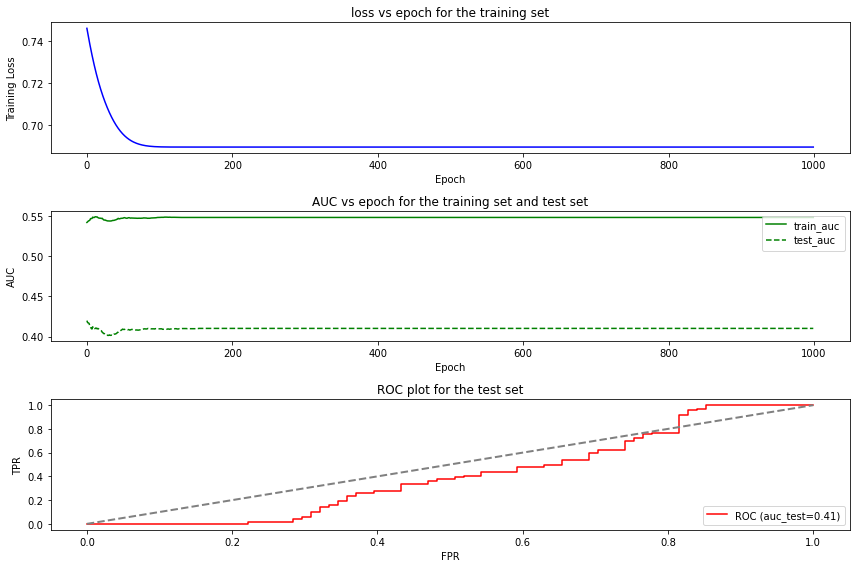

Train AUC: 0.548, Test AUC: 0.410


In [5]:
# create lists for loss and auc that will save the parameters from the different iterations for the plots
train_loss = []
train_auc = []
test_auc = []
# define numer of iterations
iters = 1000
# convert data from array to tensor
y_train_t = torch.FloatTensor(y_train).reshape(-1, 1)
x_train_t = torch.FloatTensor(x_train)
x_test_t = torch.FloatTensor(x_test)

# for each iteration
for i in range(iters):
    # apply the net with the train and test data
    y_hat_train = net(x_train_t)
    y_hat_test = net(x_test_t)
    # compute the loss value with the predicted values of train with the true labels
    loss = loss_func(y_hat_train, y_train_t)
    # apply the backward with the loss we got
    loss.backward()
    # apply step for the updates
    optimizer.step()
    # resetting the gradinates
    optimizer.zero_grad()
    
    # append the loss to the appropriate list
    train_loss.append(loss.item())
    # compute AUC for train set and append it to the appropriate list
    auc = roc_auc_score(y_train, y_hat_train.detach().numpy())
    train_auc.append(auc)
    # compute AUC for test set and append it to the appropriate list
    auc = roc_auc_score(y_test, y_hat_test.detach().numpy())
    test_auc.append(auc)
    
    
# plot the auc and loss vs epoch for the training set and test set
# create figure for all the 3 plots
fig = plt.figure(figsize=(12, 8))

# create train loss plot and add lables and title
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(train_loss, color='blue')
ax1.set_ylabel('Training Loss')
ax1.set_xlabel("Epoch")
ax1.title.set_text('loss vs epoch for the training set')

# create auc plot and add lables and title
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(train_auc, label='train_auc', color='green')
ax2.plot(test_auc, label='test_auc', color='green', linestyle='--')
ax2.legend(loc=1)
ax2.set_ylabel('AUC')
ax2.set_xlabel("Epoch")
ax2.title.set_text('AUC vs epoch for the training set and test set')

# create ROC curve and add lables and title
ax3 = fig.add_subplot(3, 1, 3)
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test.detach().numpy())
ax3.plot(fpr, tpr, label='ROC (auc_test=%.2f)'%test_auc[-1], color='red')
ax3.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
ax3.legend(loc=4)
ax3.set_ylabel('TPR')
ax3.set_xlabel("FPR")
ax3.title.set_text('ROC plot for the test set')

# add spaces between the sub plots
plt.tight_layout()
# show all the plots and print the auc
plt.show()
print('Train AUC: %.3f, Test AUC: %.3f' % (train_auc[-1], test_auc[-1]))

**Visualizing the plots**:

Test Accuracy 0.43


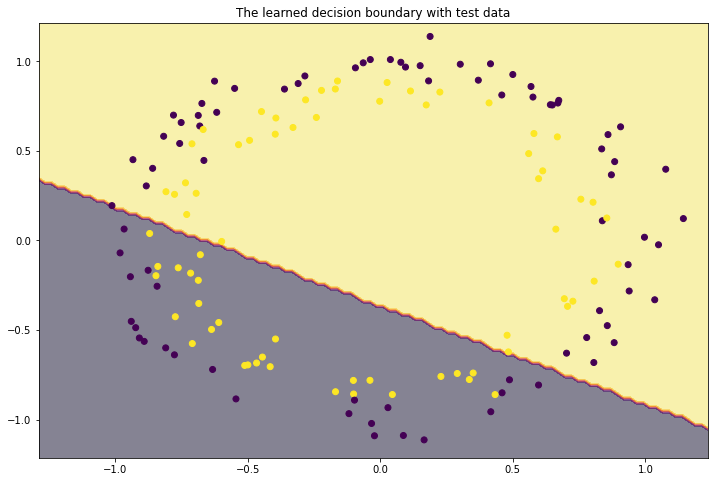

In [6]:
# convert data from array to tensor
x_test_t = torch.FloatTensor(x_test)
# apply the net with the test data
y_hat_test = net(x_test_t)
# convert lables values to 0 or 1 (classification) by treshold of 0.5
y_hat_test_class = np.where(y_hat_test.detach().numpy() < 0.5, 0, 1)
# compute accuracy for the test set
test_accuracy = np.sum(y_hat_test_class==y_test.reshape(-1, 1))/len(y_test)
print("Test Accuracy {:.2f}".format(test_accuracy))
# compute min and max for x, y for arrange the ticks axis
x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1
y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
space = min(x_max-x_min, y_max-y_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, space), np.arange(y_min, y_max, space))
# create data as (x, y) from xx, yy grid
data = np.hstack((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)))

# convert data to tensor
data_t = torch.FloatTensor(data)
# apply the network with the data
db = net(data_t)
# convert lables values to 0 or 1 (classification) by treshold of 0.5
clf = np.where(db.detach().numpy() < 0.5, 0, 1)
# plot the contour
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, clf.reshape(xx.shape), cmap=plt.cm.inferno, alpha=0.5)
# plot as scatter
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title('The learned decision boundary with test data')
plt.show()

7. Is the decision boundary linear or nonlinear in the case of a logistic regression? Explain.

You can see in the graph the test set of the data which is divided into 2 classes (yellow and blue). It can also be seen that there is a linear dividing line that has been studied and that fails to properly separate the data. </br>

The desicion boundry is linear, because the outcome always depends on the sum of the inputs and parameters. Or in other words, the output cannot depend on the product (or quotient, etc.) of its parameters.

----------------

# Classification with Neural Networks

After you implemented "classical" logistic regression, now you will be implementing a neural network with one or more hidden layers.
You will need to choose the number of hidden layers and nodes in a feedforward neural network, activation function, the type of optimizer and its hyperparmeters which will give you the best result. Remember, we don't want to overfit the training data, we want to generalize the solution for new data not seen during training. 

Plot the same graphs as in the previous sections and explain the similarities and differences. 

**Training and validation + Visualizing the plots:**

In [7]:
# the function get the test data (x and y) and plot the desicion boundry.
def visualize_desicion_boundry(x_test, y_test):
    # convert data from array to tensor
    x_test_t = torch.FloatTensor(x_test)
    # apply the net with the test data
    y_hat_test = net(x_test_t)
    # convert lables values to 0 or 1 (classification) by treshold of 0.5
    y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
    # compute accuracy for the test set
    test_accuracy = np.sum(y_hat_test_class==y_test.reshape(-1, 1))/len(y_test)
    print("Test Accuracy {:.2f}".format(test_accuracy))
    # compute min and max for x, y for arrange the ticks axis
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
    space = min(x_max-x_min, y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, space), np.arange(y_min, y_max, space))
    # create data as (x, y) from xx, yy grid
    data = np.hstack((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)))
    
    # convert data to tensor
    data_t = torch.FloatTensor(data)
    # apply the network with the data
    db = net(data_t)
    # convert lables values to 0 or 1 (classification) by treshold of 0.5
    clf = np.where(db.detach().numpy()<0.5, 0, 1)
    # plot the contour
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, clf.reshape(xx.shape), cmap=plt.cm.inferno, alpha=0.5)
    # plot as scatter
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    plt.title('The learned decision boundary with test data')
    plt.show()

In [8]:
# create a function that get the network, train and test data and the number of iterations. The function apply the feed 
# forward and backward with the network and plot all the plots we need. The function return the auc of the test set.
def create_and_plot_nn(net,x_train,x_test,y_train,y_test, iters = 1000):
    # define the loss function (binary cross entropy), learning rate and the optimizer
    loss_func = nn.BCELoss()
    learning_rate = 0.01
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    # reset parameters for the layers
    for layer in net.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()
    # resetting the gradinates
    optimizer.zero_grad()
    # create lists for loss and auc that will save the parameters from the different iterations for the plots
    train_loss = []
    train_auc = []
    test_auc = []
    # convert data from array to tensor
    y_train_t = torch.FloatTensor(y_train).reshape(-1, 1)
    x_train_t = torch.FloatTensor(x_train)
    x_test_t = torch.FloatTensor(x_test)
    
    # for each iteration
    for i in range(iters):
        # apply the net with the train and test data
        y_hat_train = net(x_train_t)
        y_hat_test = net(x_test_t)
        # compute the loss value with the predicted values of train with the true labels
        loss = loss_func(y_hat_train, y_train_t)
        # apply the backward with the loss we got
        loss.backward()
        # apply step for the updates
        optimizer.step()
        # resetting the gradinates
        optimizer.zero_grad()
        
        # append the loss to the appropriate list
        train_loss.append(loss.item())
        # compute AUC for train set and append it to the appropriate list
        auc = roc_auc_score(y_train, y_hat_train.detach().numpy())
        train_auc.append(auc)
        # compute AUC for test set and append it to the appropriate list
        auc = roc_auc_score(y_test, y_hat_test.detach().numpy())
        test_auc.append(auc)
        
    # plot the auc and loss vs epoch for the training set and test set
    # create figure for all the 3 plots
    fig = plt.figure(figsize=(12, 8))
    # create train loss plot and add lables and title
    ax1 = fig.add_subplot(3, 1, 1)
    ax1.plot(train_loss, color='blue')
    ax1.set_ylabel('Training Loss')
    ax1.set_xlabel("Epoch")
    ax1.title.set_text('loss vs epoch for the training set')
    
    # create auc plot and add lables and title
    ax2 = fig.add_subplot(3, 1, 2)
    ax2.plot(train_auc, label='train_auc', color='green')
    ax2.plot(test_auc, label='test_auc', color='green', linestyle='--')
    ax2.legend(loc=1)
    ax2.set_ylabel('AUC')
    ax2.set_xlabel("Epoch")
    ax2.title.set_text('AUC vs epoch for the training set and test set')

    # Create ROC curve
    ax3 = fig.add_subplot(3, 1, 3)
    fpr, tpr, thresholds = roc_curve(y_test, y_hat_test.detach().numpy())
    ax3.plot(fpr, tpr, label='ROC (auc_test=%.2f)'%test_auc[-1], color='red')
    ax3.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    ax3.legend(loc=4)
    ax3.set_ylabel('TPR')
    ax3.set_xlabel("FPR")
    ax3.title.set_text('ROC plot for the test set')
    
    # add spaces between the sub plots
    plt.tight_layout()
    # show all the plots and print the auc
    plt.show()
    print('Train AUC: %.3f, Test AUC: %.3f' % (train_auc[-1], test_auc[-1]))
    
    # visualizinig the desicion boundry with the function we created above
    visualize_desicion_boundry(x_test, y_test)
    
    # return the test auc
    return test_auc[-1]

**Define the Models and apply the network for finding the best network:**

The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 1


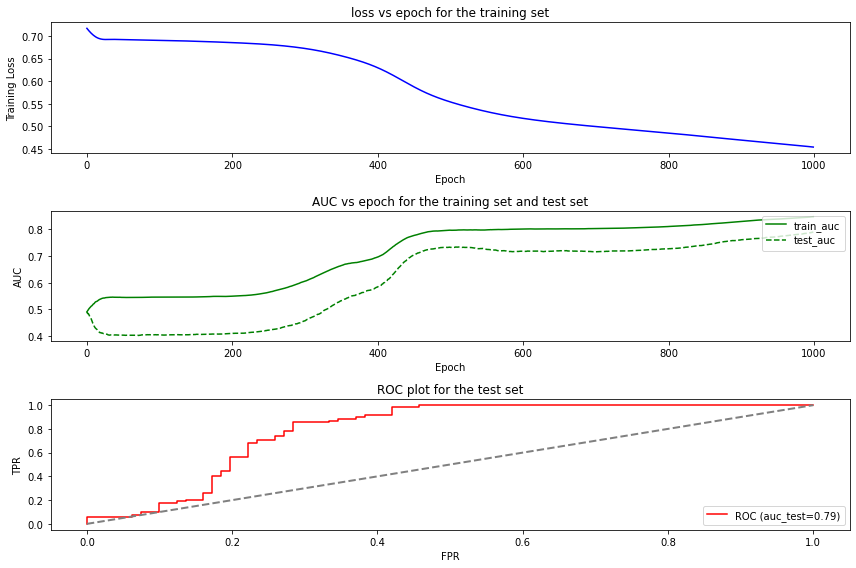

Train AUC: 0.848, Test AUC: 0.790
Test Accuracy 0.75


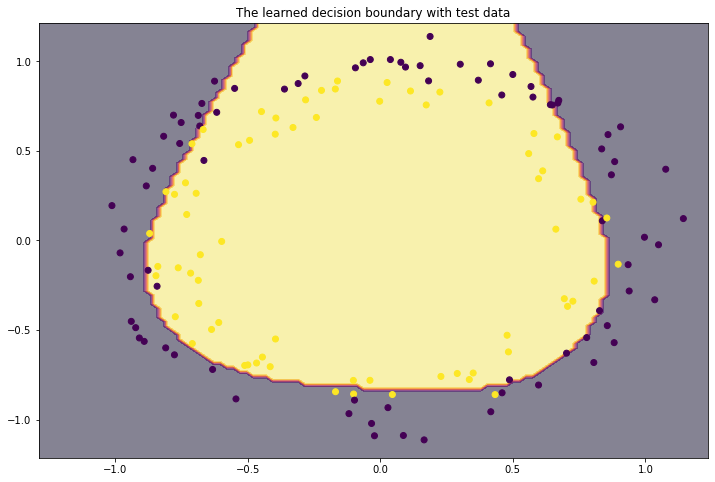

The auc is: 0.7904813025585972
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 3


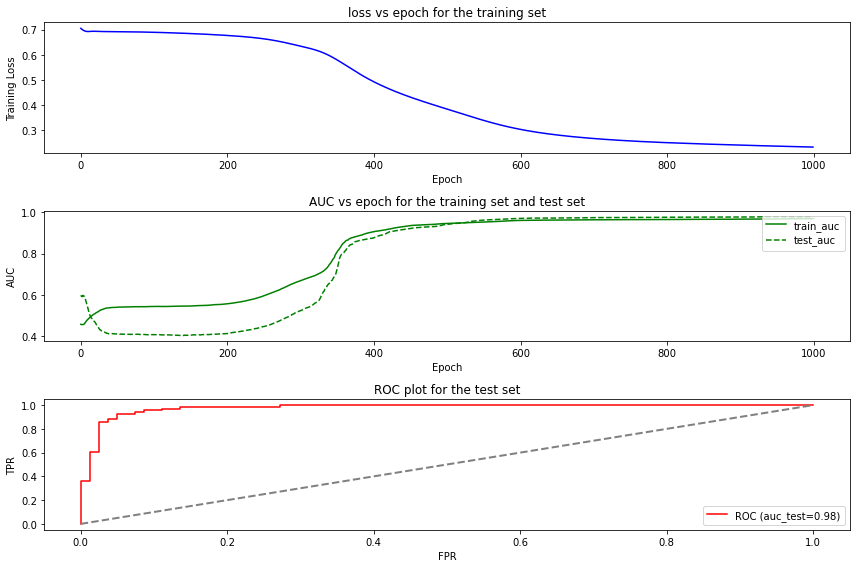

Train AUC: 0.969, Test AUC: 0.978
Test Accuracy 0.93


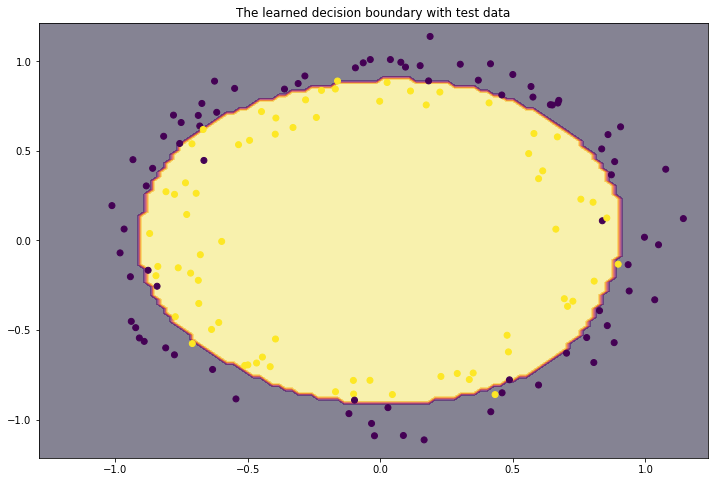

The auc is: 0.9778135623546251
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 5


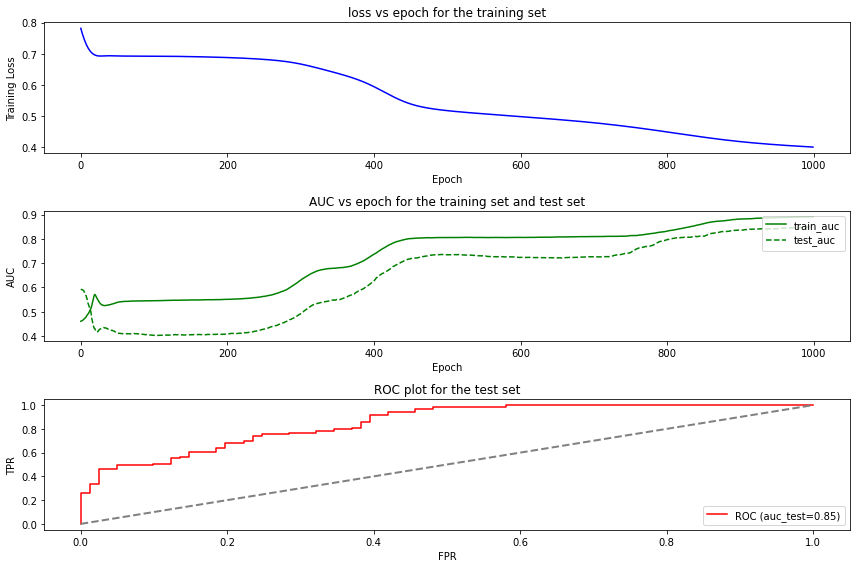

Train AUC: 0.891, Test AUC: 0.849
Test Accuracy 0.74


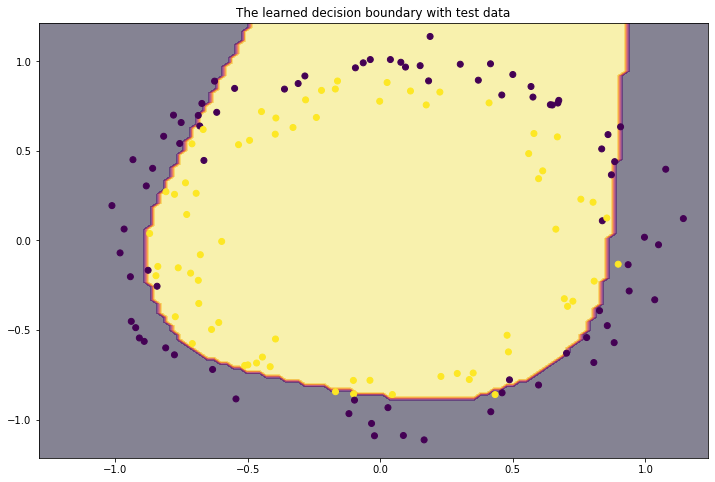

The auc is: 0.8488101628198247
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 10


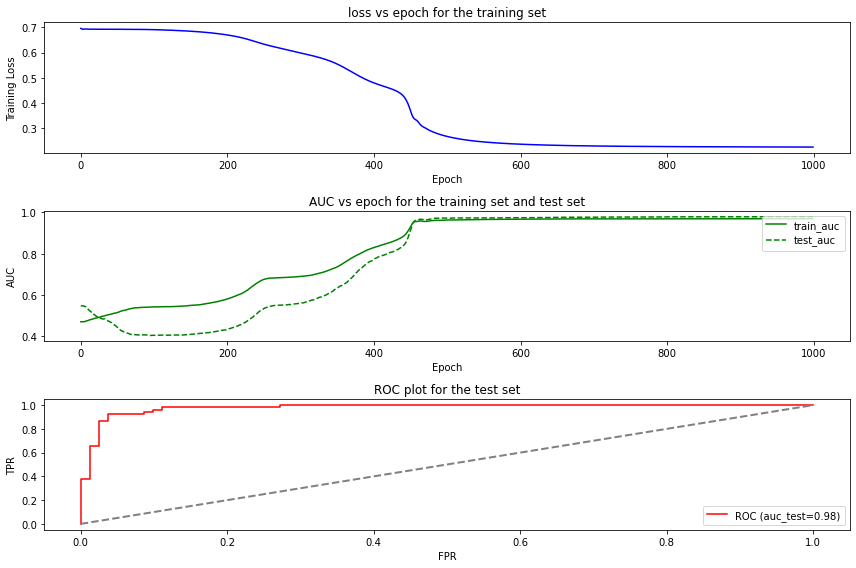

Train AUC: 0.970, Test AUC: 0.979
Test Accuracy 0.93


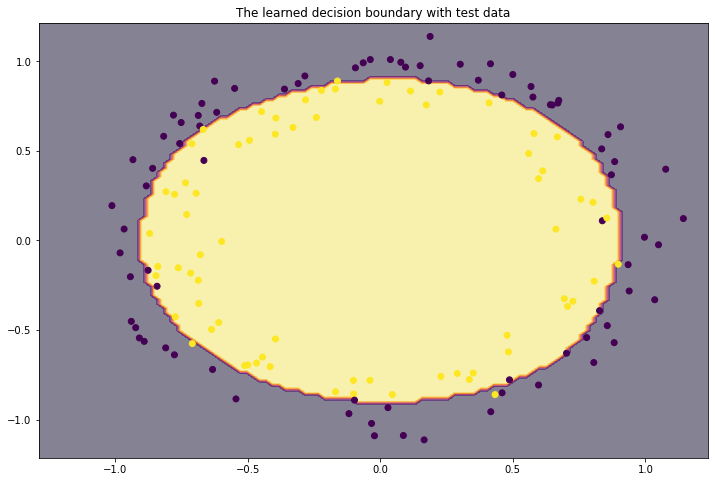

The auc is: 0.9792449454285204
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 100


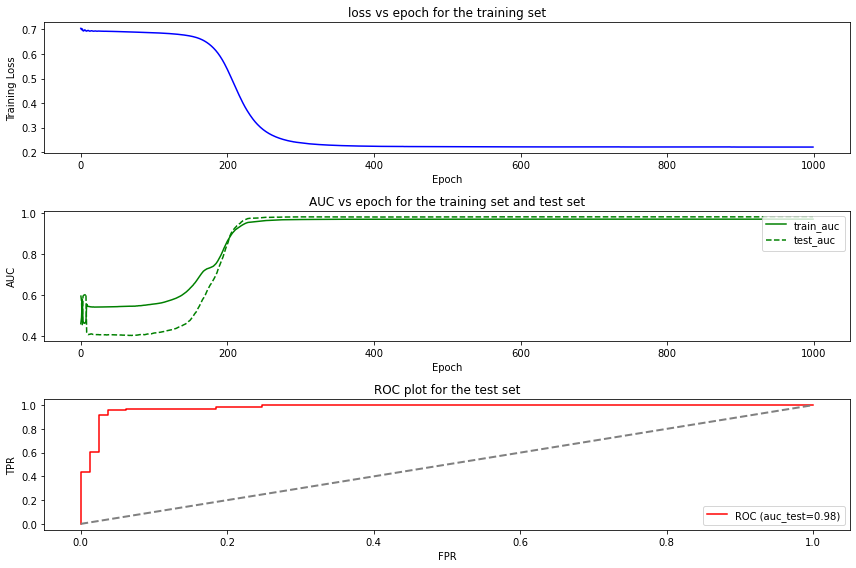

Train AUC: 0.970, Test AUC: 0.982
Test Accuracy 0.95


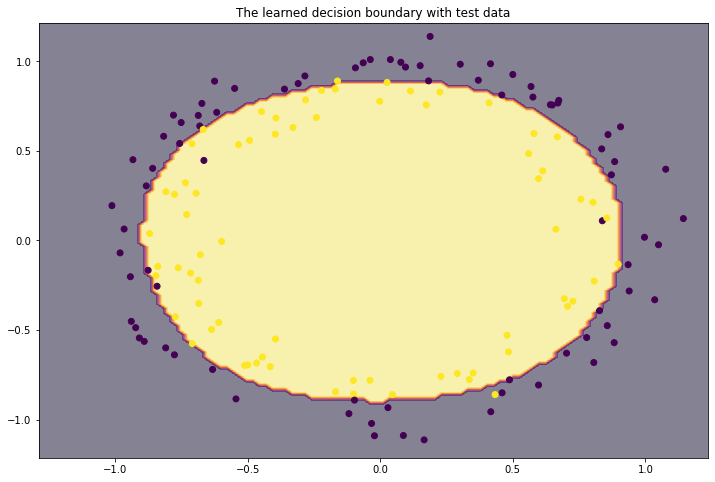

The auc is: 0.9815709429235999
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 1


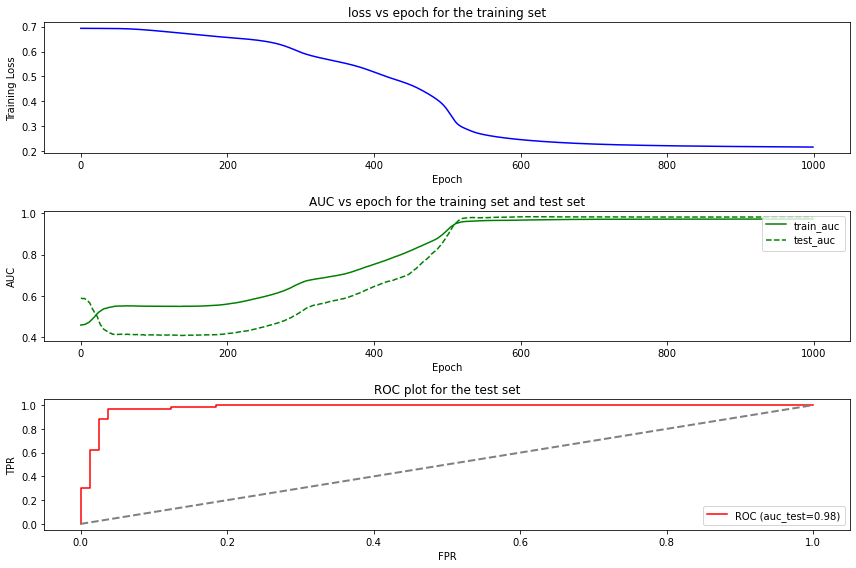

Train AUC: 0.972, Test AUC: 0.982
Test Accuracy 0.95


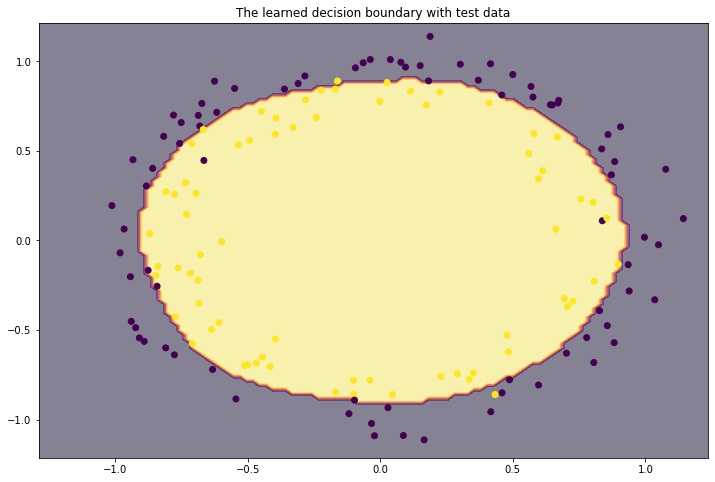

The auc is: 0.9819287886920738
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 3


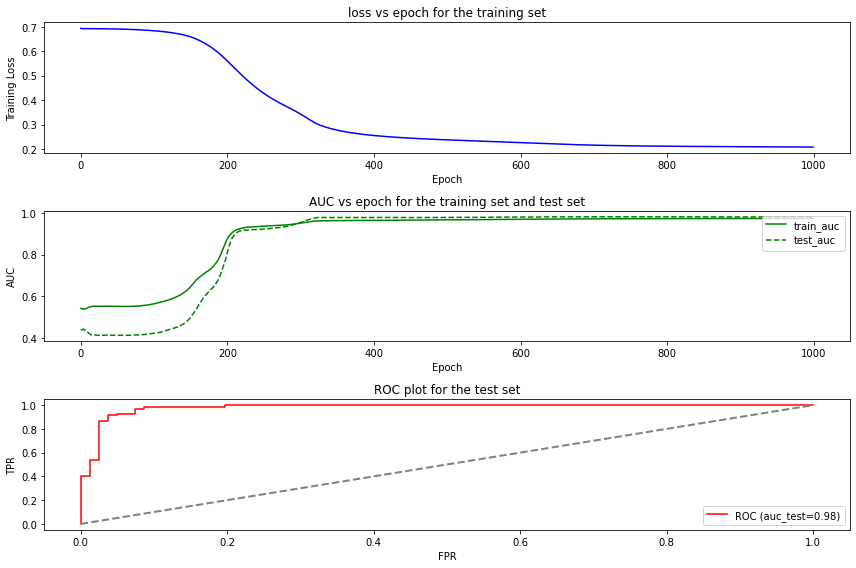

Train AUC: 0.974, Test AUC: 0.980
Test Accuracy 0.95


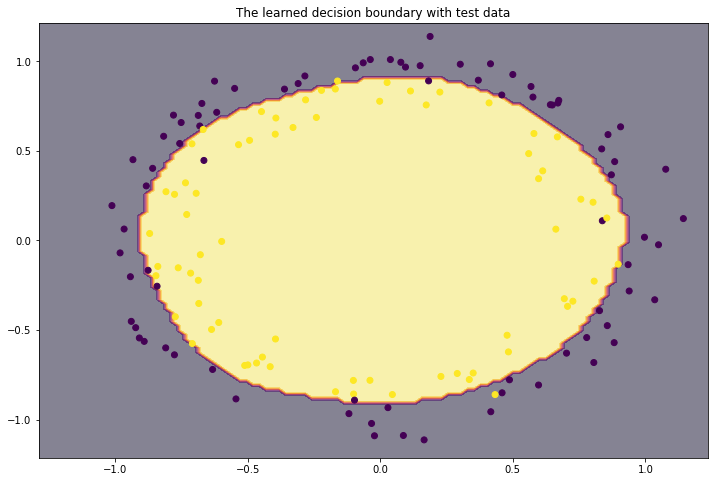

The auc is: 0.9804974056181786
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 5


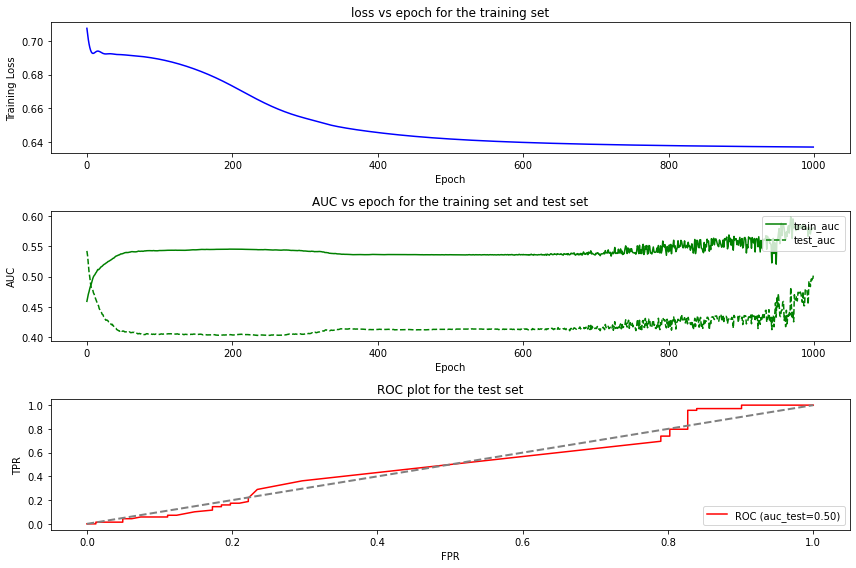

Train AUC: 0.581, Test AUC: 0.502
Test Accuracy 0.52


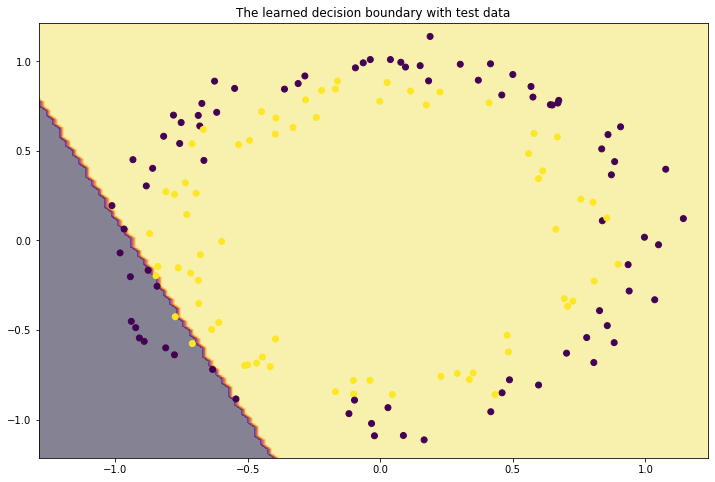

The auc is: 0.5015208445160136
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 10


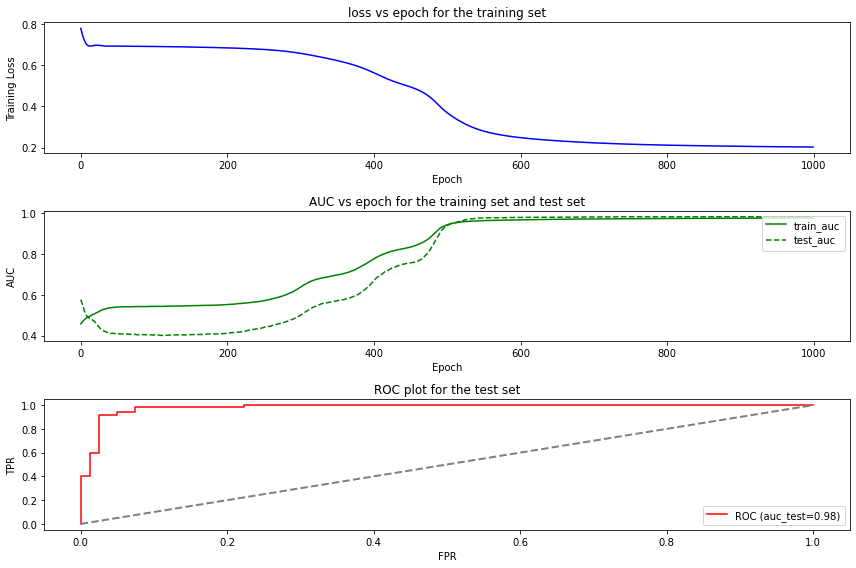

Train AUC: 0.976, Test AUC: 0.982
Test Accuracy 0.93


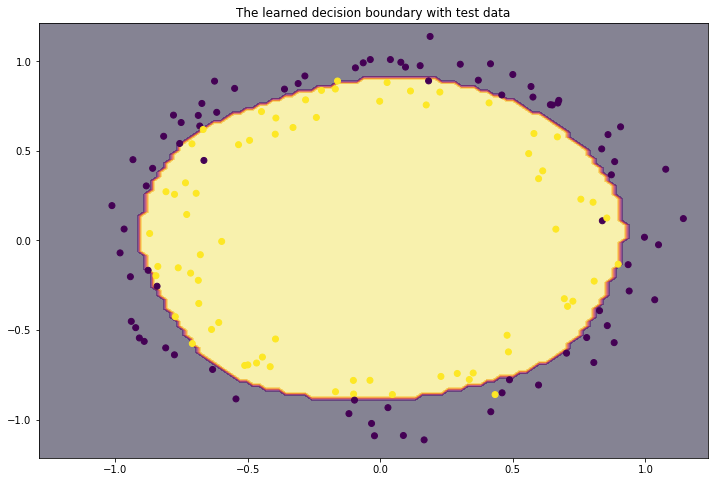

The auc is: 0.9819287886920738
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 100


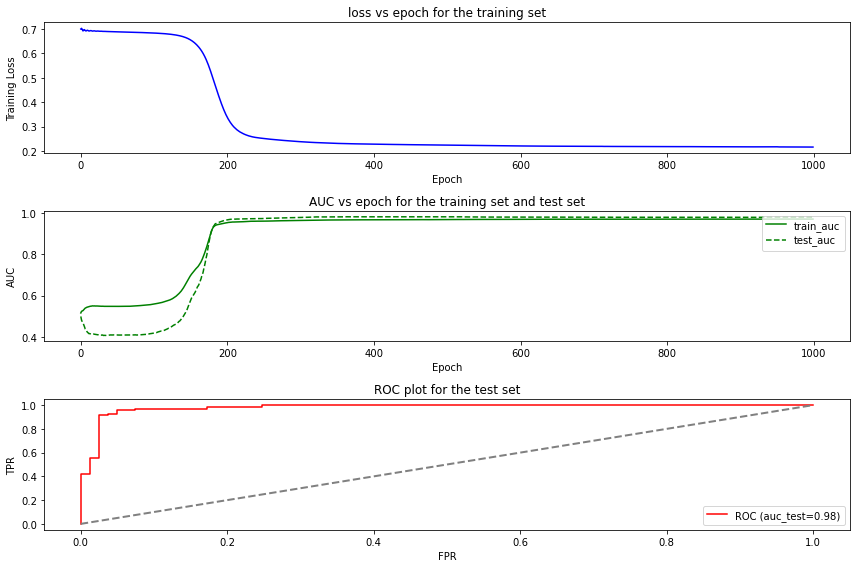

Train AUC: 0.972, Test AUC: 0.980
Test Accuracy 0.95


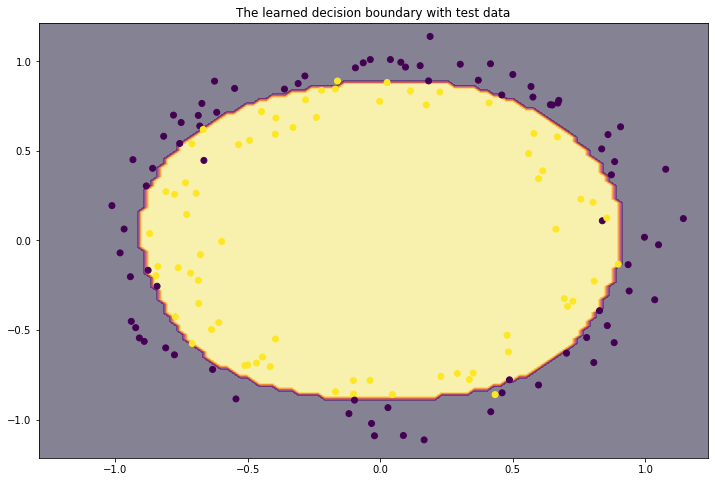

The auc is: 0.9803184827339417
The size of hidden layer 1 is: 10 and the size of hidden layer 2 is: 1


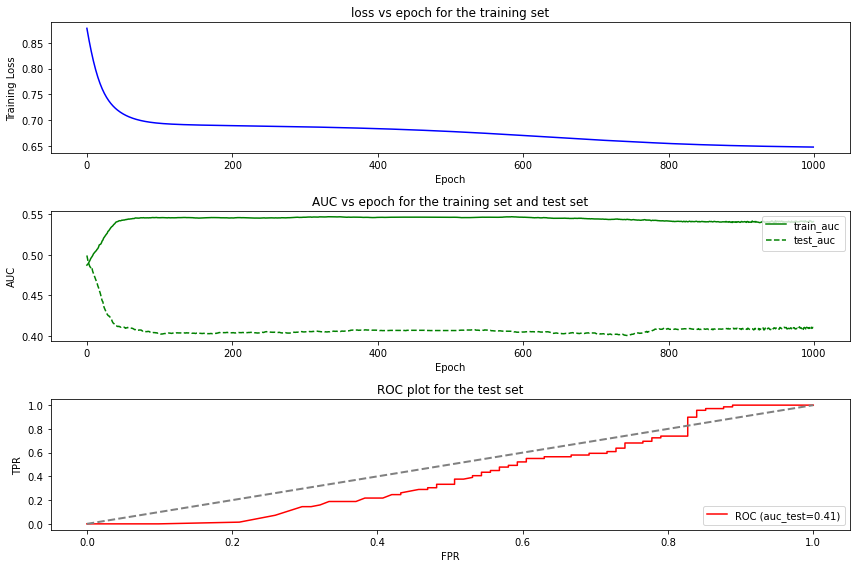

Train AUC: 0.541, Test AUC: 0.410
Test Accuracy 0.51


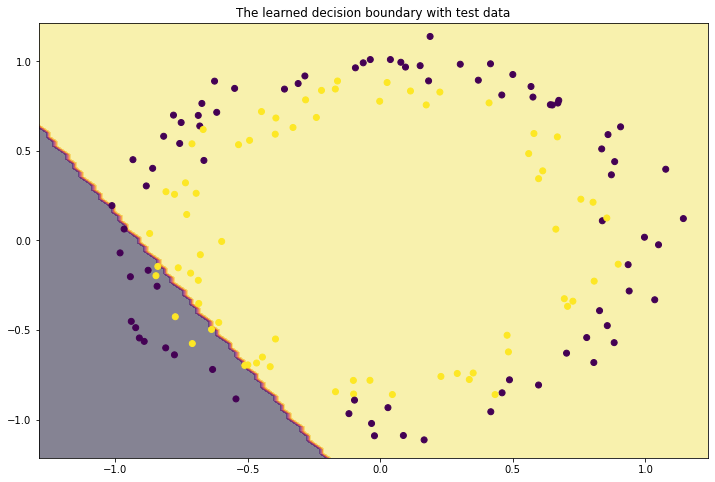

The auc is: 0.4104490964394346
The size of hidden layer 1 is: 10 and the size of hidden layer 2 is: 3


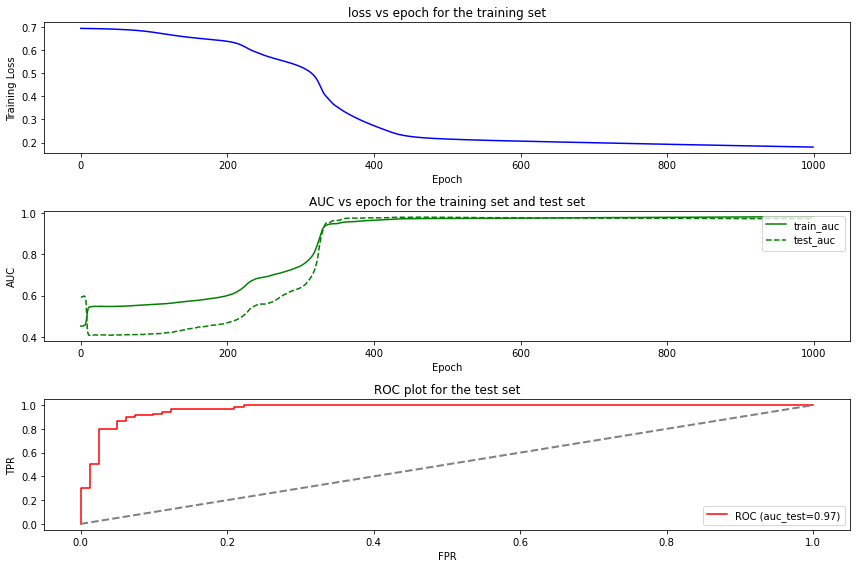

Train AUC: 0.981, Test AUC: 0.971
Test Accuracy 0.91


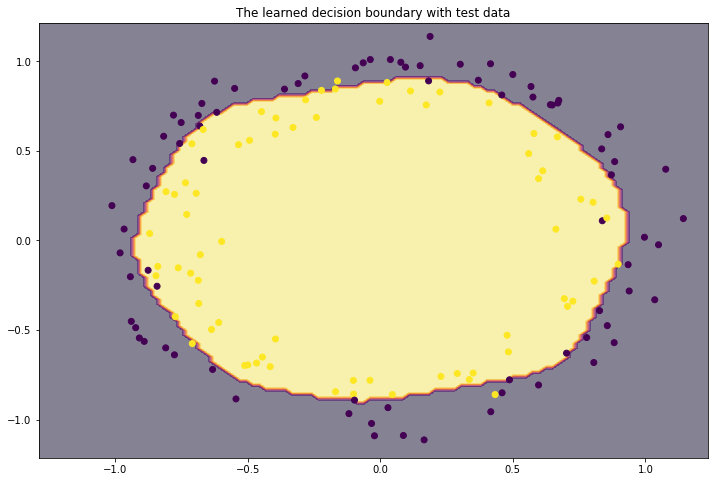

The auc is: 0.9710144927536232
The size of hidden layer 1 is: 10 and the size of hidden layer 2 is: 5


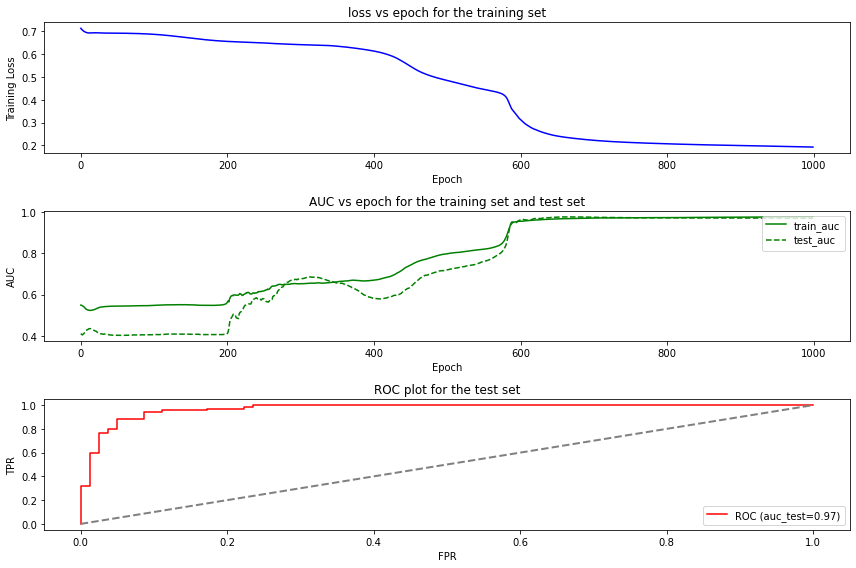

Train AUC: 0.978, Test AUC: 0.971
Test Accuracy 0.92


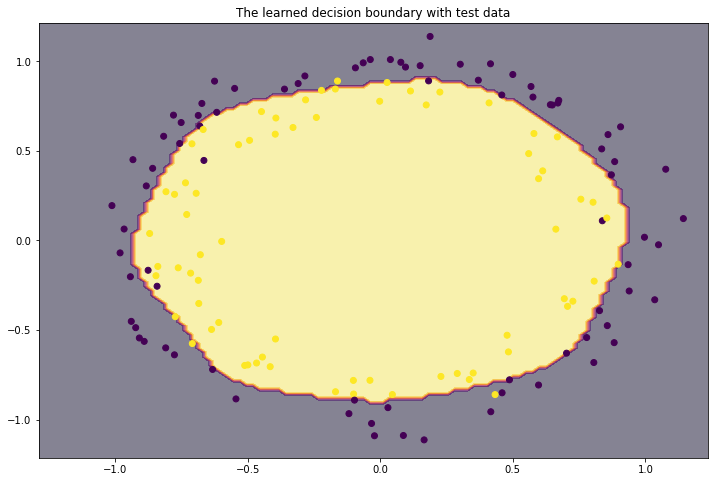

The auc is: 0.9711934156378601
The size of hidden layer 1 is: 10 and the size of hidden layer 2 is: 10


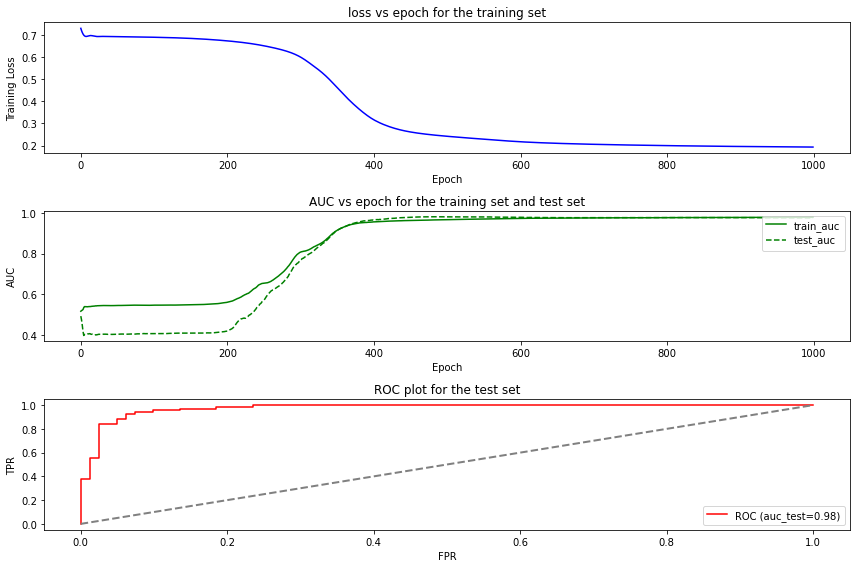

Train AUC: 0.978, Test AUC: 0.975
Test Accuracy 0.93


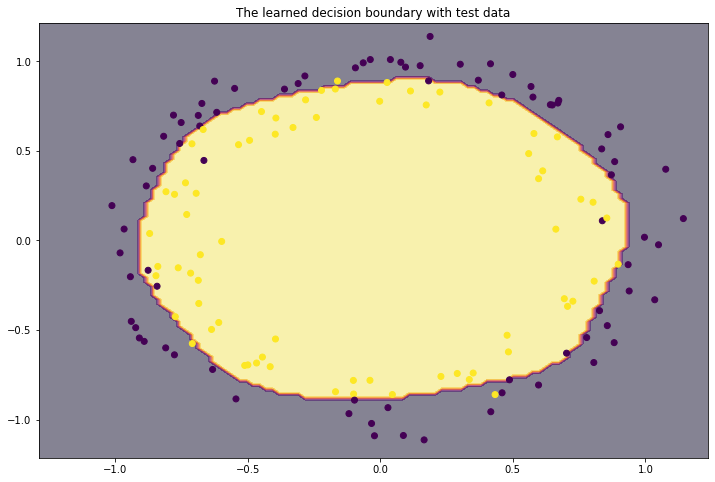

The auc is: 0.9753086419753088
The size of hidden layer 1 is: 10 and the size of hidden layer 2 is: 100


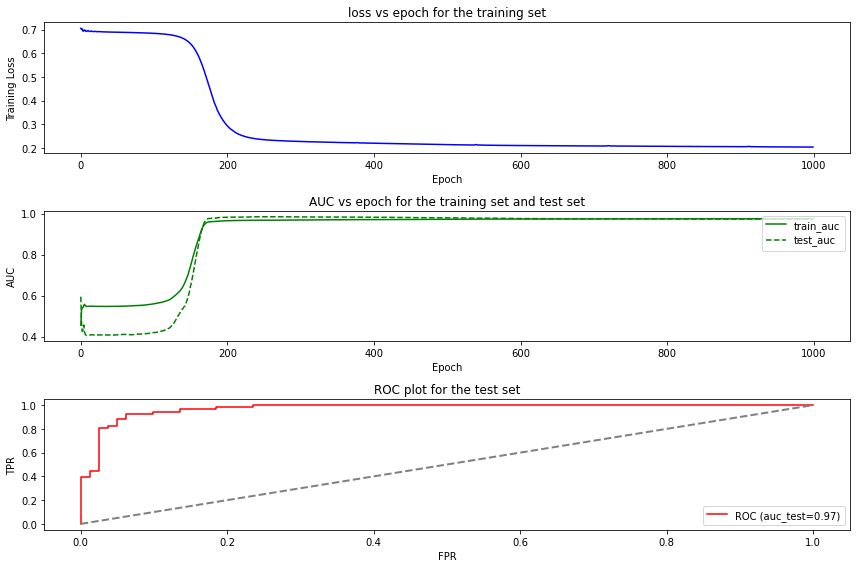

Train AUC: 0.975, Test AUC: 0.973
Test Accuracy 0.93


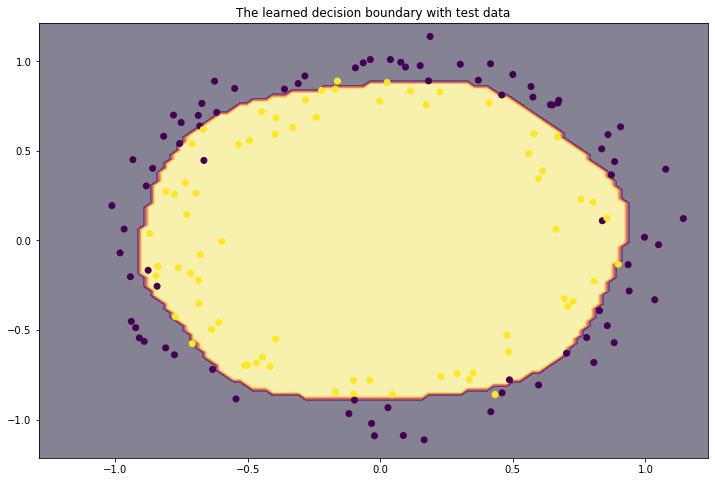

The auc is: 0.9728037215959922
The size of hidden layer 1 is: 50 and the size of hidden layer 2 is: 1


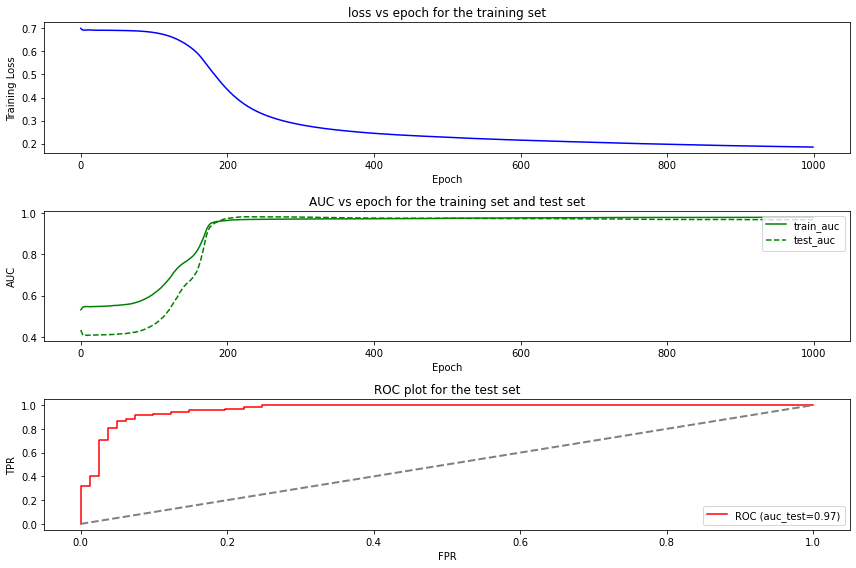

Train AUC: 0.978, Test AUC: 0.967
Test Accuracy 0.90


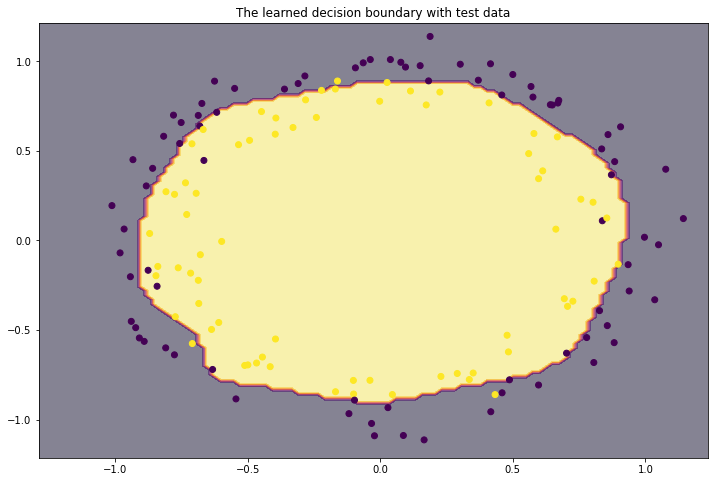

The auc is: 0.9667203435319377
The size of hidden layer 1 is: 50 and the size of hidden layer 2 is: 3


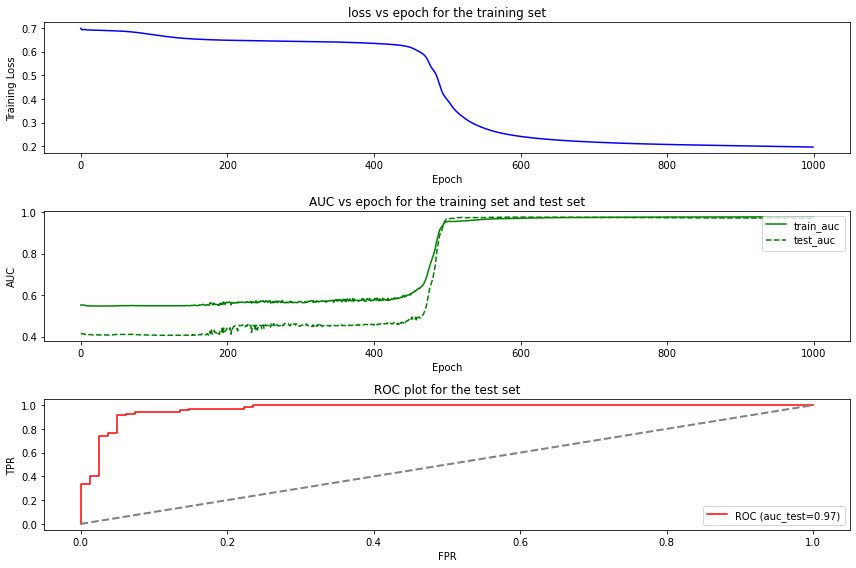

Train AUC: 0.977, Test AUC: 0.970
Test Accuracy 0.93


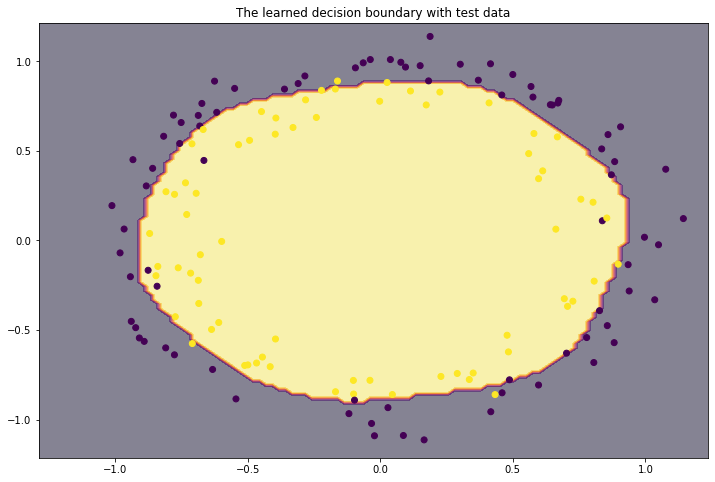

The auc is: 0.9699409554482019
The size of hidden layer 1 is: 50 and the size of hidden layer 2 is: 5


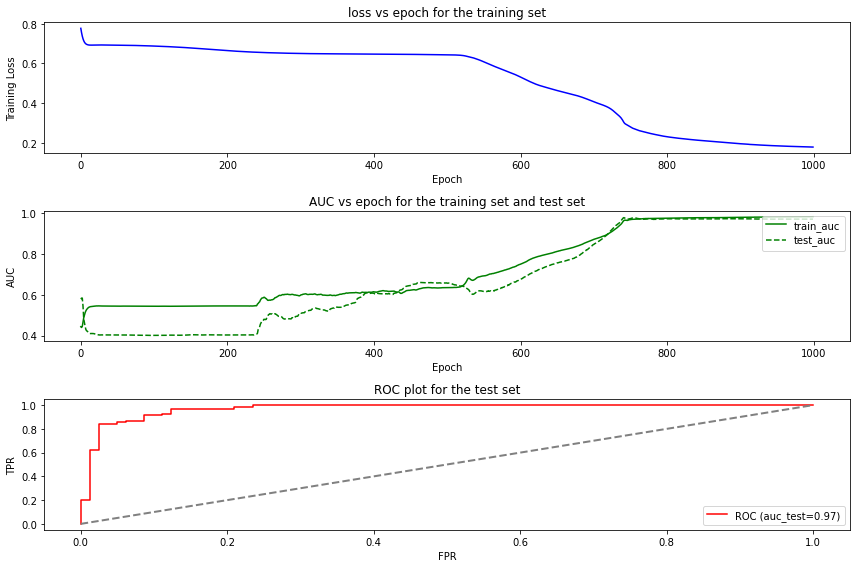

Train AUC: 0.982, Test AUC: 0.971
Test Accuracy 0.91


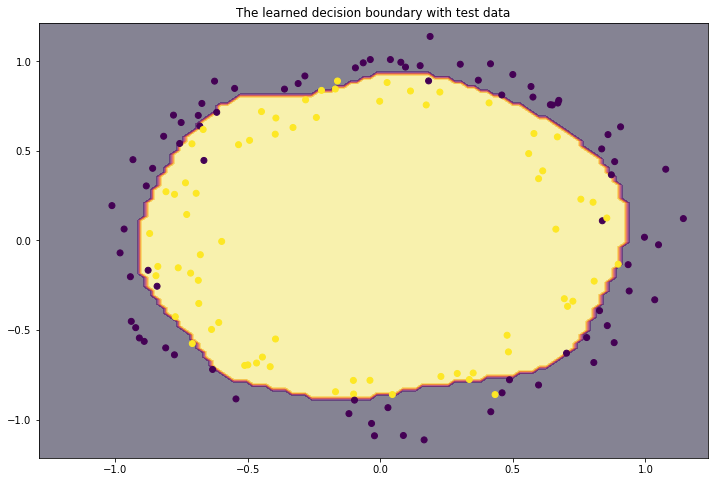

The auc is: 0.9706566469851494
The size of hidden layer 1 is: 50 and the size of hidden layer 2 is: 10


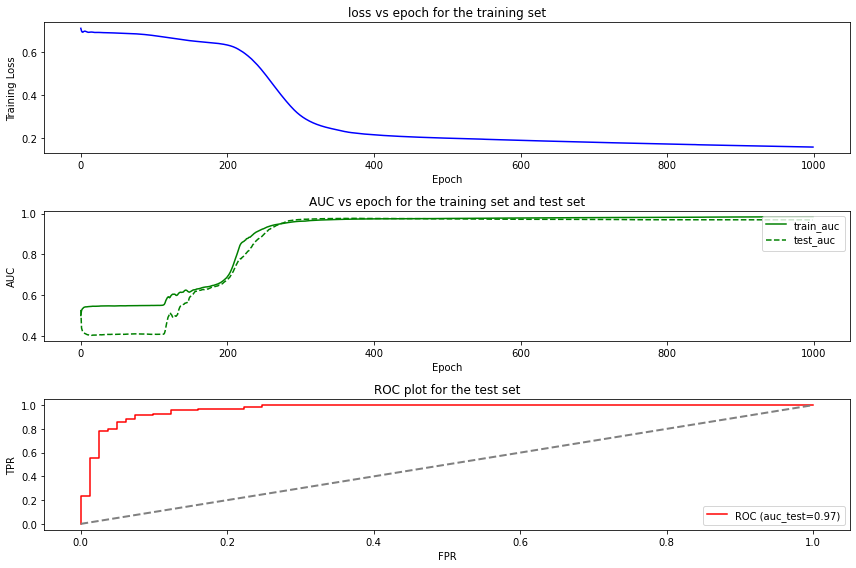

Train AUC: 0.985, Test AUC: 0.969
Test Accuracy 0.91


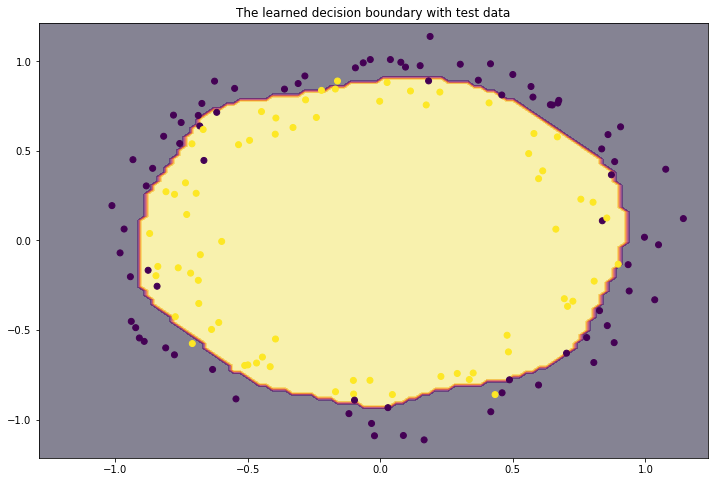

The auc is: 0.9688674181427804
The size of hidden layer 1 is: 50 and the size of hidden layer 2 is: 100


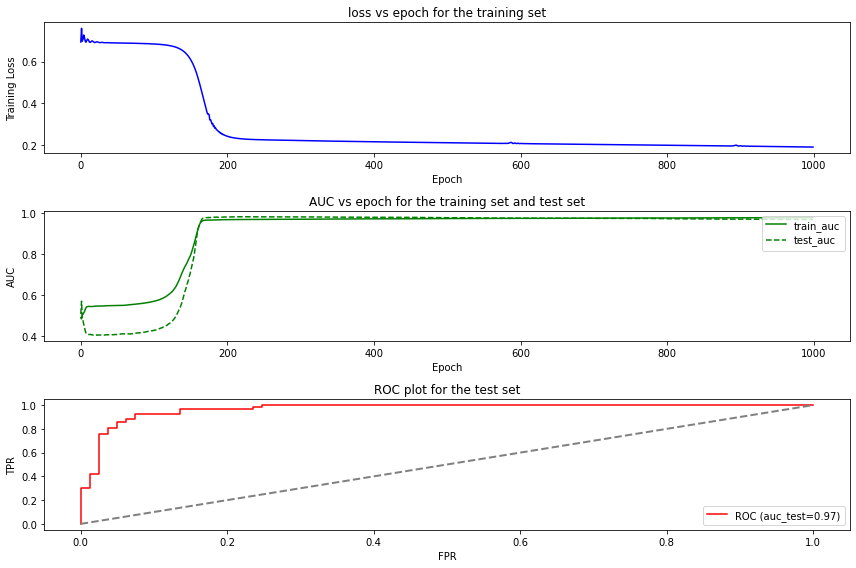

Train AUC: 0.978, Test AUC: 0.968
Test Accuracy 0.92


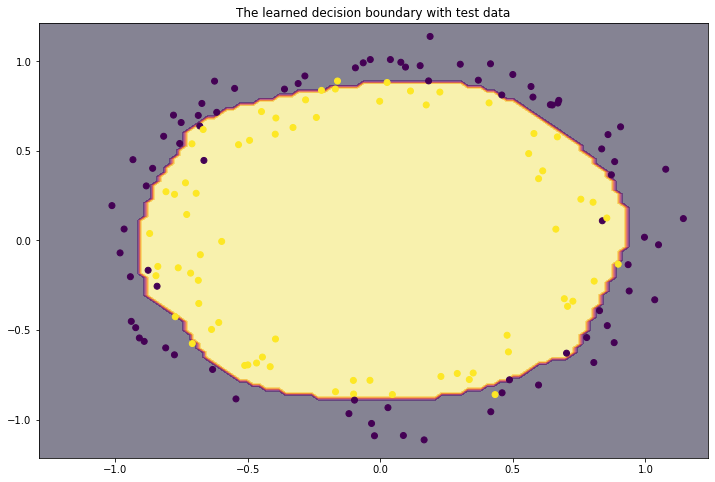

The auc is: 0.9681517266058328


In [9]:
# define input size to be 2 (the number of features) and output size to be 1 (2-calss classification)
input_size = x_train.shape[1]
output_size = 1
# define different size options for 2 hidden layers
hidden_sizes_1=[3,5,10,50]
hidden_sizes_2=[1,3,5,10,100]
# initialize the best shape with respect to AUC
best_shape = (0,0)
# initialize the maximum AUC to be 0
max_auc = 0
# initialize the best network structure
best_net = None
# for all the options of the hidden layers
for i in hidden_sizes_1:
    for j in hidden_sizes_2:
        print('The size of hidden layer 1 is:',i,'and the size of hidden layer 2 is:',j)
        #define the network with the hidden layers
        net = nn.Sequential(nn.Linear(input_size,i), nn.Sigmoid(),nn.Linear(i,j), nn.Sigmoid(), nn.Linear(j, output_size), nn.Sigmoid())
        # run the function we created for apply the network with the data
        auc = create_and_plot_nn(net ,x_train, x_test, y_train, y_test, iters = 1000)
        print('The auc is:', auc)
        print ('===============================================================')
        # check if the current auc for this network is greater than the best auc until now
        if auc > max_auc:
            # update the best auc, the best shape and best network
            max_auc = auc
            best_shape = (i,j)
            best_net = net

In [10]:
print('Our best structure for the NN is:')
print ('- The input size is 2')
print ('- The hidden layer 1 size is',best_shape[0])
print ('- The hidden layer 2 size is',best_shape[1])
print ('- The output size is 1\n')
print ('The best network is:')
print (best_net)

Our best structure for the NN is:
- The input size is 2
- The hidden layer 1 size is 5
- The hidden layer 2 size is 1
- The output size is 1

The best network is:
Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)


8. Why does a neural network need a non-linear activation function? try to figure out what heppan when you remove the activation function and explain the results.

You can see in the graph the test set of the data which is divided into 2 classes (yellow and blue). It can also be seen that there is a non-linear dividing layer that has been studied and that learns better how to properly separate the data compared to the linear dividing. </br>

We will compare the best graphs now obtained with the previous (linear) part: </br>
- The loss vs epoch graph, in the linear part does decrease and reaches a fairly constant value of 0.7, however in the new non-linear part, the value decreases to a value of almost 0.2. That is, in a non-linear network only this value can be improved.
- The AUC vs epoch graph, also in this graph in the linear part the AUC increases in training to a value of 0.55 and in the test to 0.4, whereas in the new non-linear part, the values increases to almost a value of 1. That is, in a non-linear network only This value.
- In the ROC graph, in the linear part you see that the graph is a little less good than a random graph and not with a good AUC measure, but in the new nonlinear part, the graph already reaches the shape we aim for and the AUC measure is much better than a random graph. That is, in a non-linear network only this value can be improved.
- Looking at the dividing decision line obtained, in the linear section we see that this line fails to correctly separate the different classes that are in the data so that the accuracy measure is low and not good (0.43). On the other hand in a non-linear decision line the separation is already done very well so there are still mistakes but not many, and here the accuracy value is already much higher (0.95).

That is, overall we have seen that a linear decision line does not always succeed in correctly separating the data and most of the time in reality the data will not be such that it can be divided linearly. It is therefore important to use a network that will train the network in a non-linear manner and get a more appropriate decision line. </br>

<b> non-linear activation function </b>: </br>

The activation function will usually be non-linear because when there are several layers, without a non-linear activation function in the network, a NN, no matter how many layers it had, would behave just like a single-layer perceptron. So summing these layers would give you just another linear function. <br>

We use a non-linear activation function in order to break the linearization during the forward propagation.

----------

# Regression with Neural Networks

In this part of the excercise you will need to implement a regression model using neural networks. The model should predict the output of a trigonometric function of two variables. Your data set is based on a meshgrid. Your task is to create a list of points that would correspond to a grid and use it for the input of your neural network. Then, build your neural networks and find the architecture which gives you the best results.
1. Plot the surface from the overall data and compare it to your predicted test sets.
2. Which loss function and validation metric did you choose?
3. Plot the loss and validation metrics vs epoch for the training and test sets.
4. Build a new neural network and try overfitting your training set. Show the overfitting by using learning curve plots. 
    **Note**: You can use plt.ylim() function to better focus on the changes in the trends.

<b> Answer for Q2: </b> </br>

We choose the MSE for the loss function and for the validation metric we choose the r2_score because our goal is to solve a reggresion problem and that is the acceptable metrics for this problem.


# Packages 

First import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [11]:
import numpy as np
import torch
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

**Generate data:**

In [12]:
# define seed
np.random.seed(random_num)
# create the x,y data
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
# create the output values from the trigonometric function 
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Visualize all the data:**

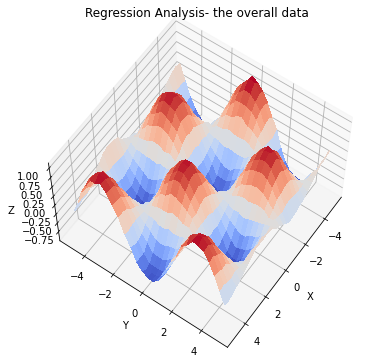

In [13]:
# Plot the surface with all the data
# create figure in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
# plot the surface
ax.plot_surface(xx, yy, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.view_init(60, 35)
# add title and labels
ax.set_title('Regression Analysis- the overall data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**Training and validation:**

In [14]:
# create a function that get the network, train and test data and the number of iterations. The function apply the feed 
# forward and backward with the network and plot all the plots we need. The function return the auc of the test set.
def create_and_plot_nn_2(net, x_train, x_test, y_train, y_test, iters=1000):
    # define the loss function (MSE for regression), learning rate and the optimizer
    learning_rate = 0.01
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    loss_func = torch.nn.MSELoss()
    # create lists for loss (mse) and r2 that will save the parameters from the different iterations for the plots
    train_mse = []
    test_mse = []
    r2_train = []
    r2_test = []
    # convert data from array to tensor
    x_train_t = torch.FloatTensor(x_train)
    y_train_t = torch.FloatTensor(y_train)
    x_test_t = torch.FloatTensor(x_test)
    y_test_t = torch.FloatTensor(y_test)
    
    # start training- for each iteration
    for t in range(iters):
        # apply the net with the train and test data
        y_hat_train = net(x_train_t)
        y_hat_test = net(x_test_t)
        # compute the loss value with the predicted values of train with the true labels
        loss = loss_func(y_hat_train, y_train_t)
        # apply the backward with the loss we got
        loss.backward()
        # apply step for the updates
        optimizer.step()
        # resetting the gradinates
        optimizer.zero_grad()
        
        # append the loss to the appropriate list
        train_mse.append(loss.item())
        # compute mse for test set and append it to the appropriate list
        test_mse.append(mean_squared_error(y_test_t, y_hat_test.detach().numpy()))
        # compute r2 for train set and append it to the appropriate list
        r2_train.append(r2_score(y_train_t.data.numpy(), y_hat_train.data.numpy()))
         # compute r2 for test set and append it to the appropriate list
        r2_test.append(r2_score(y_test_t.data.numpy(), y_hat_test.data.numpy()))
        

    print("Train MSE: %.2f, Test MSE: %.2f" % ((train_mse[-1] * 1, test_mse[-1] * 1)))
    # return the test mse
    return test_mse[-1], train_mse, test_mse, r2_train, r2_test

**Define the Models and apply the network for finding the best network:**

In [15]:
# convert the xx, yy data in appropriate format for the input data
input_data = np.hstack((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)))
# convert z to appropriate format for the output
z_vector = z.reshape(-1, 1)
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input_data, z_vector, test_size=0.2, random_state=123)

# define input size to be 2 (the number of features) and output size to be 1 (regression)
input_size = x_train.shape[1]
output_size = 1
# define different size options for 2 hidden layers
hidden_sizes_1 = [3,5,10,50]
hidden_sizes_2 = [1,3,5,10,100]

# initialize the best shape with respect to AUC
best_shape = (0,0)
# initialize the minimum MSE to be infinity
min_MSE = np.inf
# initialize the best network structure
best_net = None
# intialize the lists of metrics for best network
train_mse_best = []
test_mse_best = []
train_r2_best = []
test_r2_best = []

# for all the options of the hidden layers
for i in hidden_sizes_1:
    for j in hidden_sizes_2:
        print('The size of hidden layer 1 is:',i,'and the size of hidden layer 2 is:',j)
        # define a neural network  with the hidden layers
        net = torch.nn.Sequential(
                torch.nn.Linear(input_size, i),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(i, j),
                torch.nn.LeakyReLU(),
                torch.nn.Linear(j, output_size))
        # run the function we created for apply the network with the data
        MSE, train_mse, test_mse, r2_train, r2_test = create_and_plot_nn_2(net, x_train, x_test, y_train, y_test)
        print('The MSE is:', MSE)
        print ('===============================================================')
        # check if the current MSE for this network is lower than the best MSE until now
        if MSE < min_MSE:
            # update the best MSE, the best shape and best network
            min_MSE = MSE
            best_shape = (i,j)
            best_net = net
            # update the cest lists of metrics
            train_mse_best = train_mse
            test_mse_best = test_mse
            train_r2_best = r2_train
            test_r2_best = r2_test

The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 1
Train MSE: 0.24, Test MSE: 0.25
The MSE is: 0.24539778
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 3
Train MSE: 0.19, Test MSE: 0.19
The MSE is: 0.18736441
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 5
Train MSE: 0.15, Test MSE: 0.16
The MSE is: 0.15659949
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 10
Train MSE: 0.09, Test MSE: 0.12
The MSE is: 0.11847218
The size of hidden layer 1 is: 3 and the size of hidden layer 2 is: 100
Train MSE: 0.06, Test MSE: 0.07
The MSE is: 0.07498503
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 1
Train MSE: 0.19, Test MSE: 0.20
The MSE is: 0.20328306
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 3
Train MSE: 0.10, Test MSE: 0.10
The MSE is: 0.101562575
The size of hidden layer 1 is: 5 and the size of hidden layer 2 is: 5
Train MSE: 0.12, Test MSE: 0.12
The MSE is: 0.11715

In [16]:
print('Our best structure for the NN is:')
print ('- The input size is 2')
print ('- The hidden layer 1 size is',best_shape[0])
print ('- The hidden layer 2 size is',best_shape[1])
print ('- The output size is 1\n')
print ('The best network is:')
print (best_net)

Our best structure for the NN is:
- The input size is 2
- The hidden layer 1 size is 50
- The hidden layer 2 size is 100
- The output size is 1

The best network is:
Sequential(
  (0): Linear(in_features=2, out_features=50, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=50, out_features=100, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=100, out_features=1, bias=True)
)


**Visualizing the plots for the best network:**

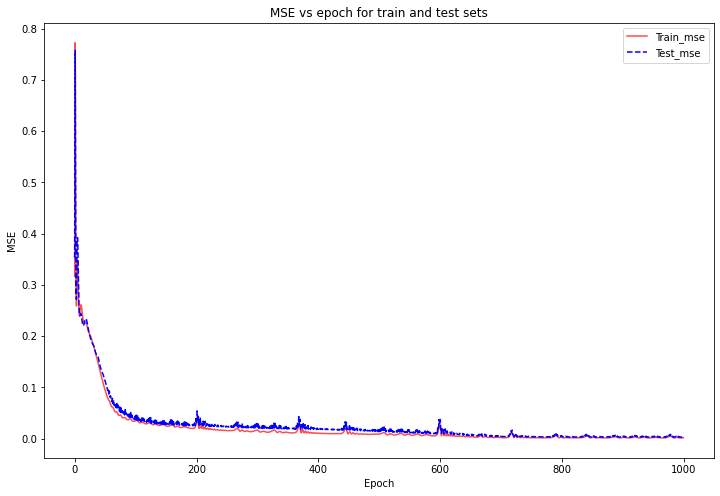

In [17]:
# create figure for mse vs epoch
fig = plt.figure(figsize=(12, 8))
# plot the train mse in red
plt.plot(train_mse_best, color='red', alpha=0.7, label='Train_mse')
# plot the test mse in blue
plt.plot(test_mse_best, color='blue', linestyle='--', label='Test_mse')
# add title, lables and legend
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs epoch for train and test sets')
plt.legend()
plt.show()

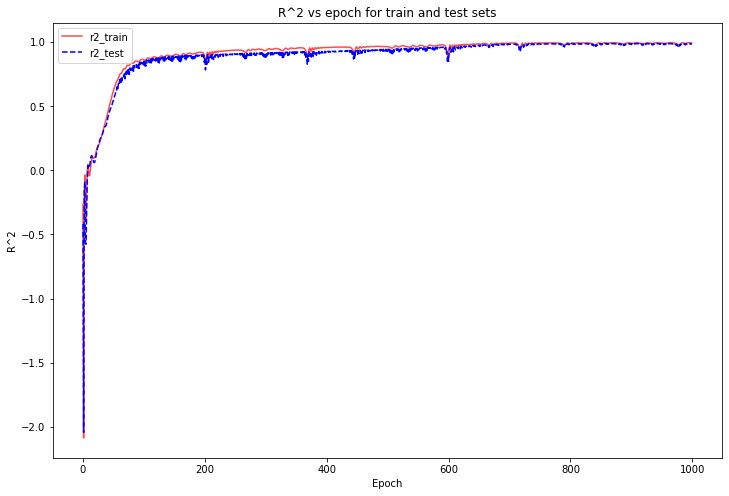

In [18]:
# create figure for r2 vs epoch
fig = plt.figure(figsize=(12, 8))
# plot the train r2 in red
plt.plot(train_r2_best, color='red', alpha=0.7, label='r2_train')
# plot the test r2 in blue
plt.plot(test_r2_best, color='blue', linestyle='--', label='r2_test')
# add title, lables and legend
plt.xlabel('Epoch')
plt.ylabel('R^2')
plt.title('R^2 vs epoch for train and test sets')
plt.legend()
plt.show()

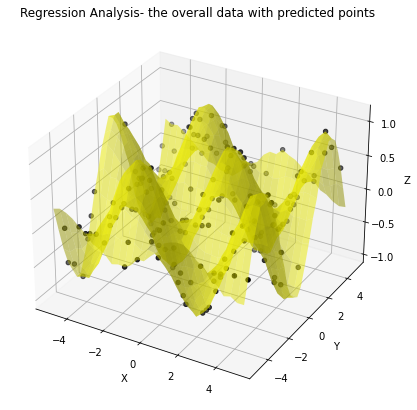

In [19]:
# Plot the surface with train ans test sets and also the predicted points of the test tes
# create figure in 3D
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
# plot the surface of all the data in yellow
ax1.plot_surface(xx, yy, z, color='yellow', alpha=0.5)
# plot the predictes points in balck
ax1.scatter(x_test[:, 0], x_test[:, 1], y_test, color='black')
# add title and labels
ax1.set_title('Regression Analysis- the overall data with predicted points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.show()

### Build a new neural network and try overfitting your training set

**Generate data:**

In [20]:
# define seed
np.random.seed(random_num)
# create the x,y data
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
# create the output values from the trigonometric function 
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [21]:
# convert the xx, yy data in appropriate format for the input data
input_data = np.hstack((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)))
# convert z to appropriate format for the output
z_vector = z.reshape(-1, 1)
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(input_data, z_vector, test_size=0.2, random_state=123)


# define input size to be 2 (the number of features) and output size to be 1 (regression)
input_size = x_train.shape[1]
output_size = 1
# define large size of hidden layers for over fitting
hidden_sizes_1 = 300
hidden_sizes_2 = 150
# define a neural network
net = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_sizes_1),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(hidden_sizes_1, hidden_sizes_2),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(hidden_sizes_2, output_size))

# define the loss function (MSE for regression), learning rate and the optimizer
loss_func = torch.nn.MSELoss()
# small learning rate than before
learning_rate = 0.00005
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# define number of iterations- larger than before for over fitting
num_iter = 50000

**Training and validation:**

In [22]:
# create lists for loss (mse) and r2 that will save the parameters from the different iterations for the plots
train_mse = []
test_mse = []
r2_train = []
r2_test = []
# convert data from array to tensor
x_train_t = torch.FloatTensor(x_train)
y_train_t = torch.FloatTensor(y_train)
x_test_t = torch.FloatTensor(x_test)
y_test_t = torch.FloatTensor(y_test)

# start training- for each iteration
for t in range(num_iter):
    # apply the net with the train and test data
    y_hat_train = net(x_train_t)
    y_hat_test = net(x_test_t)
    # compute the loss value with the predicted values of train with the true labels
    loss = loss_func(y_hat_train, y_train_t)
    # apply the backward with the loss we got
    loss.backward()
    # apply step for the updates
    optimizer.step()
    # resetting the gradinates
    optimizer.zero_grad()
        
    # append the loss to the appropriate list
    train_mse.append(loss.item())
    # compute mse for test set and append it to the appropriate list
    test_mse.append(mean_squared_error(y_test_t, y_hat_test.detach().numpy()))
    # compute r2 for train set and append it to the appropriate list
    r2_train.append(r2_score(y_train_t.data.numpy(), y_hat_train.data.numpy()))
     # compute r2 for test set and append it to the appropriate list
    r2_test.append(r2_score(y_test_t.data.numpy(), y_hat_test.data.numpy()))

print("Train MSE: %.2f, Test MSE: %.2f" % ((train_mse[-1] * 1, test_mse[-1] * 1)))

Train MSE: 0.00, Test MSE: 0.00


**Visualizing the plots:**

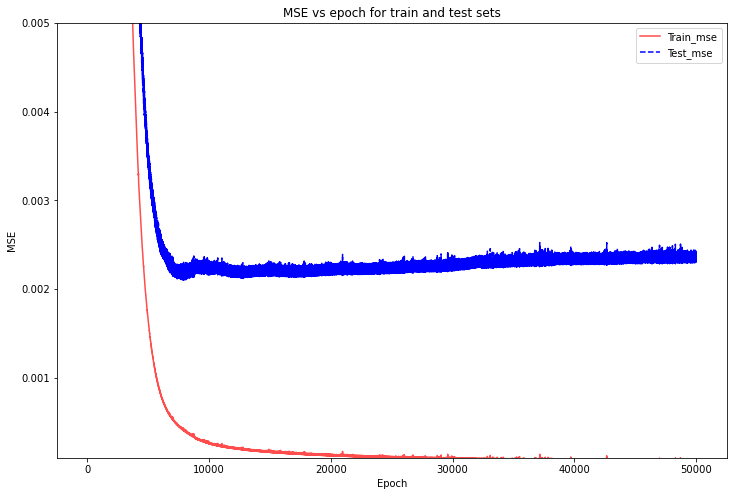

In [23]:
# create figure for mse vs epoch
fig = plt.figure(figsize=(12, 8))
# plot the train mse in red
plt.plot(train_mse, color='red', alpha=0.7, label='Train_mse')
# plot the test mse in blue
plt.plot(test_mse, color='blue', linestyle='--', label='Test_mse')
# add title, lables and legend
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs epoch for train and test sets')
plt.legend()
# change the range in y axis
plt.ylim(0.0001, 0.005)
plt.show()

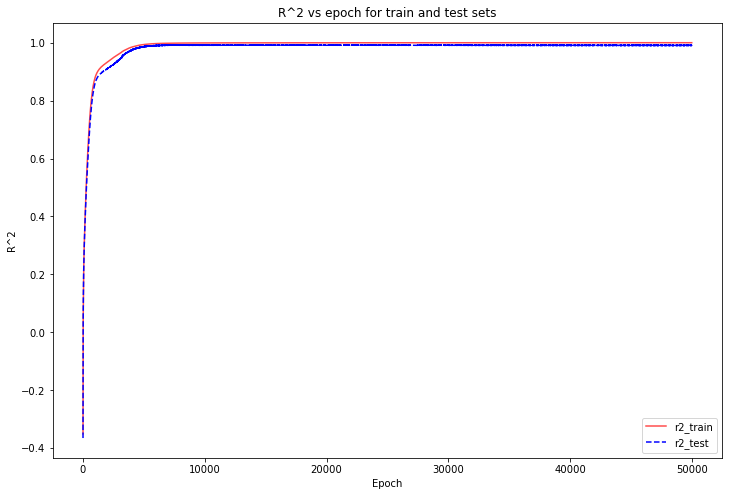

In [24]:
# create figure for r2 vs epoch
fig = plt.figure(figsize=(12, 8))
# plot the train r2 in red
plt.plot(r2_train, color='red', alpha=0.7, label='r2_train')
# plot the test r2 in blue
plt.plot(r2_test, color='blue', linestyle='--', label='r2_test')
# add title, lables and legend
plt.xlabel('Epoch')
plt.ylabel('R^2')
plt.title('R^2 vs epoch for train and test sets')
plt.legend()
plt.show()

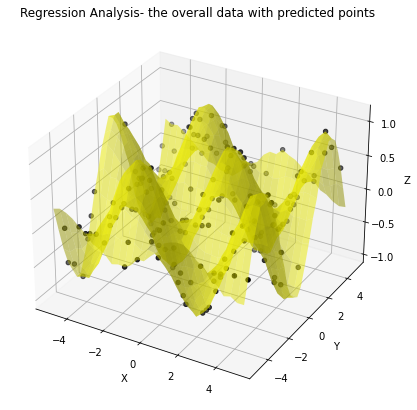

In [25]:
# Plot the surface with train ans test sets and also the predicted points of the test tes
# create figure in 3D
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
# plot the surface of all the data in yellow
ax1.plot_surface(xx, yy, z, color='yellow', alpha=0.5)
# plot the predictes points in balck
ax1.scatter(x_test[:, 0], x_test[:, 1], y_test, color='black')
# add title and labels
ax1.set_title('Regression Analysis- the overall data with predicted points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.show()

5. Briefly explain graph's results.

In the MSE vs epoch graph it can be seen that the MSE on the training set continues to go down and down as we expect but for the validation set, at some point around 9000 epochs there is a small increase starts. This increase indicates over-fitting in the data. </br>

In the R ^ 2 vs epoch graph it can be seen that there is an increase to a value of 1 as before, so this mesure improves along the iterations on both the validation set and the training set. </br>

In the graph of the data surface with the predicted points, it can be seen that still the generalization to the data from the test set is good, we conclude that learning an equation from a data set of training is something more likely to succeed than the problems that exist in reality so learning is done well.

6. How does your metric value differs between the training data and the test data and why?


The MSE for the trained set decreased, while the MSE for the test set decreased and in some point increased. These changes occured due to overtraining that we were asked to reach. In this situation the model learns the training dataset too well but does not perform well on a hold out sample. </br>

Also in our plot, the mse decreased on the training set, and in the test set decreased and in some point increased. The MSE for the trained set is much lower than the MSE for the test set. The MSE for the trained set will always decrease during the epochs because the parameters tuning relies on the trained set.